In [1]:
from pycaret.regression import *

In [2]:
from pycaret.datasets import get_data

In [3]:
dataset = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [4]:
# dataset = get_data('diamond',profile=True)

In [5]:
data = dataset.sample(frac=0.9,random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True,inplace=True)
data_unseen.reset_index(drop=True,inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ',str(data_unseen.shape))

Data for Modeling: (5400, 8)
Unseen Data For Predictions  (600, 8)


In [6]:
exp_reg102 = setup(data=data, target="Price",
	session_id=123,
	normalize=True,
	transformation=True,
	transform_target=True,
	# combine_rare_levels=True,
	# rare_level_threshold=0.05,
	remove_multicollinearity=True,
	multicollinearity_threshold=0.95,
	bin_numeric_features=['Carat Weight'],
	log_experiment=True, experiment_name='diamond1',)
	# silent=True)

,Description,Value
0,Session id,123
1,Target,Price
2,Target type,Regression
3,Original data shape,"(5400, 8)"
4,Transformed data shape,"(5400, 28)"
5,Transformed train set shape,"(3779, 28)"
6,Transformed test set shape,"(1621, 28)"
7,Ordinal features,1
8,Numeric features,1
9,Categorical features,6


In [7]:
best_model = compare_models(exclude=['ransac'])#,'lightgbm'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1707.9544,5903344.1271,2417.2365,0.9413,0.2225,0.1887,0.0450
lightgbm,Light Gradient Boosting Machine,1660.9066,6358156.8678,2495.2445,0.9377,0.2235,0.1842,0.0710
xgboost,Extreme Gradient Boosting,1732.9093,6998796.7039,2619.1033,0.9308,0.2263,0.1874,0.0490
rf,Random Forest Regressor,1741.3787,7137302.0316,2652.7687,0.9301,0.2402,0.1914,0.0570
et,Extra Trees Regressor,1899.5518,8861962.0801,2964.1057,0.9123,0.2605,0.2042,0.0580
dt,Decision Tree Regressor,1917.2621,9348381.9398,3041.8356,0.9078,0.2611,0.2045,0.0450
huber,Huber Regressor,2459.0362,13448255.4580,3652.8315,0.8665,0.2773,0.2450,0.0480
ridge,Ridge Regression,2525.0260,13756677.3170,3694.6290,0.8634,0.2745,0.2399,0.0460
lr,Linear Regression,2525.0683,13779965.9350,3697.4189,0.8631,0.2748,0.2400,0.1680
br,Bayesian Ridge,2528.8946,13826571.0344,3703.9074,0.8627,0.2745,0.2399,0.0470


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [8]:
tuned_best = tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1679.0225,5267570.3128,2295.1188,0.9422,0.2189,0.1822
1,1966.8693,12919474.9145,3594.3671,0.9010,0.2313,0.1945
2,1836.1748,7936481.8015,2817.1762,0.9272,0.2408,0.2054
3,1679.5022,5620524.0428,2370.7644,0.9380,0.2139,0.1786
4,1723.3571,5921593.8542,2433.4325,0.9261,0.2317,0.1982
5,1904.1648,13019205.0876,3608.2136,0.8889,0.2263,0.1933
6,1849.4508,8032177.3277,2834.1096,0.9245,0.2285,0.1930
7,1364.8422,4934572.8565,2221.3898,0.9376,0.1954,0.1531
8,1799.9373,7083354.7602,2661.4573,0.9304,0.2253,0.1871


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [9]:
# dt = create_model('dt')

In [10]:
# import numpy as np
# num = 1
# dt_params = {
# "num_leaves": np.arange(10,200,10),
# "max_depth": [int(x) for x in np.linspace(10,110,num * 11)],
# "learning_rate": np.arange(0.1,1,0.1)
# }

In [11]:
# tuned_dt = tune_model(dt,custom_grid=dt_params)

In [12]:
# plot_model(tuned_best,plot="residuals_interactive")

In [13]:
best_model = compare_models(exclude=['ransac'])
tuned_best = tune_model(best_model)
lightgbm = create_model('lightgbm')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1707.9544,5903344.1271,2417.2365,0.9413,0.2225,0.1887,0.0490
lightgbm,Light Gradient Boosting Machine,1660.9066,6358156.8678,2495.2445,0.9377,0.2235,0.1842,0.0880
xgboost,Extreme Gradient Boosting,1732.9093,6998796.7039,2619.1033,0.9308,0.2263,0.1874,0.0480
rf,Random Forest Regressor,1741.3787,7137302.0316,2652.7687,0.9301,0.2402,0.1914,0.0590
et,Extra Trees Regressor,1899.5518,8861962.0801,2964.1057,0.9123,0.2605,0.2042,0.0600
dt,Decision Tree Regressor,1917.2621,9348381.9398,3041.8356,0.9078,0.2611,0.2045,0.0470
huber,Huber Regressor,2459.0362,13448255.4580,3652.8315,0.8665,0.2773,0.2450,0.0500
ridge,Ridge Regression,2525.0260,13756677.3170,3694.6290,0.8634,0.2745,0.2399,0.0460
lr,Linear Regression,2525.0683,13779965.9350,3697.4189,0.8631,0.2748,0.2400,0.0460
br,Bayesian Ridge,2528.8946,13826571.0344,3703.9074,0.8627,0.2745,0.2399,0.0470


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1679.0225,5267570.3128,2295.1188,0.9422,0.2189,0.1822
1,1966.8693,12919474.9145,3594.3671,0.9010,0.2313,0.1945
2,1836.1748,7936481.8015,2817.1762,0.9272,0.2408,0.2054
3,1679.5022,5620524.0428,2370.7644,0.9380,0.2139,0.1786
4,1723.3571,5921593.8542,2433.4325,0.9261,0.2317,0.1982
5,1904.1648,13019205.0876,3608.2136,0.8889,0.2263,0.1933
6,1849.4508,8032177.3277,2834.1096,0.9245,0.2285,0.1930
7,1364.8422,4934572.8565,2221.3898,0.9376,0.1954,0.1531
8,1799.9373,7083354.7602,2661.4573,0.9304,0.2253,0.1871


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1631.2197,4764978.7229,2182.8831,0.9477,0.2273,0.1848
1,1786.1408,8517522.8962,2918.4796,0.9347,0.2257,0.1875
2,1678.9553,5196108.3842,2279.4974,0.9523,0.2389,0.1997
3,1641.9054,4585709.6133,2141.4270,0.9494,0.2129,0.1765
4,1669.5466,6287592.8249,2507.5073,0.9216,0.2293,0.1919
5,1739.9398,8399345.6706,2898.1625,0.9283,0.2197,0.1862
6,1846.1307,8981458.3319,2996.9081,0.9156,0.2294,0.1871
7,1254.5156,3385188.9328,1839.8883,0.9572,0.1903,0.1479
8,1651.8998,6412245.8029,2532.2413,0.9370,0.2195,0.1779


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [14]:
import numpy as np
lgbm_params = {
"num_leaves": np.arange(10,200,10),
"max_depth": [int(x) for x in np.linspace(10,110,num = 11)],
"learning_rate": np.arange(0.1,1,0.1)
}

tuned_lightgbm = tune_model(lightgbm,custom_grid=lgbm_params)
plot_model(tuned_best,plot="residuals_interactive")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1675.2714,5086398.1446,2255.3044,0.9442,0.2344,0.1883
1,1795.2791,8215553.0369,2866.2786,0.9370,0.2363,0.1923
2,1838.7086,7425749.0618,2725.0228,0.9319,0.2468,0.2060
3,1674.8863,5123457.3518,2263.5055,0.9435,0.2180,0.1780
4,1700.3237,6162104.8259,2482.3587,0.9231,0.2358,0.1948
5,1748.1738,8683121.7790,2946.7137,0.9259,0.2272,0.1892
6,1926.7462,10303603.5644,3209.9227,0.9032,0.2382,0.1893
7,1331.8388,4013445.1362,2003.3585,0.9492,0.1965,0.1521
8,1716.2054,6753901.5664,2598.8270,0.9337,0.2287,0.1845


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


    'data': [{'hovertemplate': 'Split=train<br>Predictions…

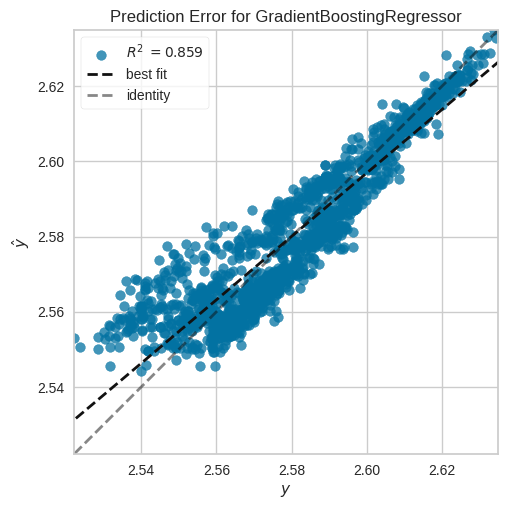

In [15]:
plot_model(tuned_best,plot="error")

In [16]:
evaluate_model(tuned_best)
predict_model(tuned_best)
final_best = finalize_model(tuned_best)
save_model(final_best,'diamond-pipeline')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,1760.3773,6164870.2398,2482.9157,0.9438,0.2237,0.1886


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['Carat Weight'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Cut', 'Color', '...
                                     transformer=KBinsDiscretizer(encode='ordinal',
                                                                  strategy='kmeans'))),
                 ('transformation',
                  TransformerWrapper(transformer=PowerTransformer(standardize=False))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
           

In [17]:
unseen_predictions = predict_model(final_best,data=data_unseen)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,1789.0088,6578248.0595,2564.8096,0.9361,0.2227,0.1853


In [18]:
unseen_predictions.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,prediction_label
0,1.53,Ideal,E,SI1,ID,ID,AGSL,2.657130,10166.494098
1,1.50,Fair,F,SI1,VG,VG,GIA,2.650441,9562.490920
2,1.01,Good,E,SI1,G,G,GIA,2.622831,4360.275460
3,2.51,Very Good,G,VS2,VG,VG,GIA,2.683593,30857.551363
4,1.01,Good,I,SI1,VG,VG,GIA,2.613765,3756.506116


In [19]:
from pycaret.utils.generic import check_metric

In [24]:
check_metric(data_unseen.Price,unseen_predictions.prediction_label,'R2')

0.9361

In [21]:
data_unseen.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791
1,1.50,Fair,F,SI1,VG,VG,GIA,10450
2,1.01,Good,E,SI1,G,G,GIA,5161
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361
4,1.01,Good,I,SI1,VG,VG,GIA,4238
